In [270]:
import pandas as pd
import numpy as np

In [271]:
df = pd.read_csv('boat_data.csv')
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [273]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [274]:
df[['currency','price1']]=df['Price'].str.split(' ',1, expand = True)

<ipython-input-274-83d2d98116c1>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['currency','price1']]=df['Price'].str.split(' ',1, expand = True)


In [275]:
df['currency']

0       CHF
1       EUR
2       CHF
3       DKK
4       EUR
       ... 
9883    CHF
9884    EUR
9885    EUR
9886    EUR
9887    CHF
Name: currency, Length: 9888, dtype: object

In [276]:
df['price1']

0        3337
1        3490
2        3770
3       25900
4        3399
        ...  
9883     4900
9884     4516
9885     4499
9886     4300
9887     3780
Name: price1, Length: 9888, dtype: object

In [277]:
df['price1'].astype(int)

0        3337
1        3490
2        3770
3       25900
4        3399
        ...  
9883     4900
9884     4516
9885     4499
9886     4300
9887     3780
Name: price1, Length: 9888, dtype: int64

In [278]:
df['currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [279]:
def price_USD(price, currency):
  if currency == 'CHF':
    return int(price)*1.12
  elif currency == 'EUR':
    return int(price)*1.10
  elif currency == 'DKK':
    return int(price)*0.15
  elif currency == 'Â£':
    return int(price)*1.25
     

In [280]:
df['Price'] = df.apply(lambda x : price_USD(x.price1, x.currency), axis=1)

In [281]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,price1
0,3737.44,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337
1,3839.00,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,4222.40,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900
4,3738.90,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [282]:
df.drop(['currency', 'price1', 'Location'], axis=1, inplace=True)

In [283]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days
0,3737.44,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226
1,3839.00,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75
2,4222.40,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64
4,3738.90,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58


In [284]:
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
dtype: int64

In [285]:
df.dropna(inplace=True)

In [286]:
df.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
dtype: int64

In [287]:
df.duplicated().sum()

0

In [288]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [289]:
df['Boat Type'] = le.fit_transform(df['Boat Type'])
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])
df['Type'] = le.fit_transform(df['Type'])
df['Material'] = le.fit_transform(df['Material'])

In [290]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days
1,3839.0,36,720,14,2020,4.00,1.50,8,75
2,4222.4,99,444,14,0,3.69,1.42,0,124
4,3738.9,62,410,14,2019,3.55,1.46,0,58
5,4088.0,99,410,14,0,4.03,1.56,0,132
10,3920.0,62,720,10,1987,4.35,1.75,2,239


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 1 to 9887
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        7048 non-null   float64
 1   Boat Type                    7048 non-null   int64  
 2   Manufacturer                 7048 non-null   int64  
 3   Type                         7048 non-null   int64  
 4   Year Built                   7048 non-null   int64  
 5   Length                       7048 non-null   float64
 6   Width                        7048 non-null   float64
 7   Material                     7048 non-null   int64  
 8   Number of views last 7 days  7048 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 550.6 KB


In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

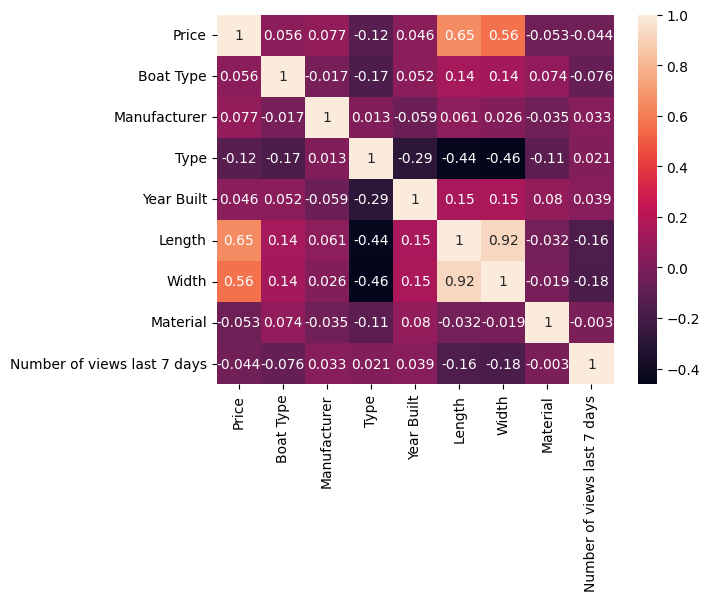

In [293]:
sns.heatmap(df.corr(), annot=True)

In [294]:
X = df.drop(['Price'], axis=1)
y = df.Price

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [297]:
from sklearn.tree import DecisionTreeRegressor

In [298]:
#without featureselection

In [317]:
model = DecisionTreeRegressor(random_state=42)

In [318]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [319]:
y_pred = model.predict(X_test)

In [320]:
y_pred

array([107690., 106590., 643500., ..., 109450.,  65989.,  31900.])

In [321]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [322]:
mse = mean_squared_error(y_test, y_pred)
mse

58856131976.85952

In [323]:
mae = mean_absolute_error(y_test, y_pred)
mae

77858.58694562648

In [324]:
rs = r2_score(y_test, y_pred)
rs

0.9036372632869563

In [325]:
#using featute selection technique RFE

In [326]:
from sklearn.feature_selection import RFE

In [327]:
rfe = RFE(DecisionTreeRegressor(random_state=42))

In [328]:
rfe.fit(X,y)

RFE(estimator=DecisionTreeRegressor(random_state=42))

In [329]:
X_train1 = rfe.transform(X_train)
X_test1 = rfe.transform(X_test)

In [330]:
model.fit(X_train1, y_train)

DecisionTreeRegressor(random_state=42)

In [331]:
y_pred1= model.predict(X_test1)

In [332]:
y_pred1

array([107690. ,  95590. , 643500. , ..., 112437.5,  65989. ,  28490. ])

In [333]:
mse1 = mean_squared_error(y_test, y_pred)
mse1

58856131976.85952

In [334]:
mae1 = mean_absolute_error(y_test, y_pred)
mae1

77858.58694562648

In [335]:
rs1 = r2_score(y_test, y_pred)
rs1

0.9036372632869563

In [336]:
rfe.n_features_

4

In [337]:
rfe.get_support()

array([False, False, False,  True,  True,  True, False,  True])

In [338]:
rfe.ranking_

array([5, 2, 3, 1, 1, 1, 4, 1])

In [339]:
feature_selected = X.columns[rfe.get_support()]
feature_selected

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days'], dtype='object')

In [340]:
# using Tree-based feature selection

In [341]:
# Calculate feature importances
importances = model.feature_importances_

In [342]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [343]:
# Select the top 5 features
num_features = 5
selected_features = X_train.columns[indices][:num_features]


In [344]:
# Train a model on the selected features and evaluate its performance on the test set
model_selected = DecisionTreeRegressor(random_state=42)
model_selected.fit(X_train[selected_features], y_train)
score = model_selected.score(X_test[selected_features], y_test)

In [345]:
print(f'Selected Features: {selected_features}')
print(f'Accuracy: {score:.2f}')

Selected Features: Index(['Manufacturer', 'Boat Type', 'Type', 'Year Built'], dtype='object')
Accuracy: 0.33


In [346]:
y_pred_selected = model_selected.predict(X_test[selected_features])

In [347]:
r2_score(y_test, y_pred_selected)

0.32755730404034633

In [ ]:
#I tried with Tree based feature section but i was geeting very low accuracy comparitively. if possible please guide me